**Group Project- Ecommerece Churn Prediction Model**

Submitted By Group 11

Aditya Harikumar B2023062

Ashish Kumar B2023075

Harsh Shukla B2023090

S Rajalakshmi B2023102

Sneha PP B2023108

Sumeli Mitra B2023110

**Reading the Master Data File**

In [1]:
import pandas as pd

df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/E Commerce Customer Master Data.xlsx')
print(df1.head())


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  
0  La

**Reading the Customer Transaction Data file**

In [2]:


import pandas as pd
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/E Commerce Customer Transaction Data.xlsx')
print(df2.head())


   CustomerID  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0       50001                9         1                         11.0   
1       50002                7         1                         15.0   
2       50003                6         1                         14.0   
3       50004                8         0                         23.0   
4       50005                3         0                         11.0   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0         1.0         1.0                5.0          159.93  
1         0.0         1.0                0.0          120.90  
2         0.0         1.0                3.0          120.28  
3         0.0         1.0                3.0          134.07  
4         1.0         1.0                3.0          129.60  


In [3]:
print(df1.shape)
print(df2.shape)

(5630, 13)
(5630, 8)


**Merging the dataframes on the primary key Customer ID**

In [4]:


df = pd.merge(df1, df2, on='CustomerID', how='inner')
print(df.head())
print(df.shape)

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

**Summary Statistics Of The Dataframe**

In [5]:


print(df.describe())
print(df.info())

         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min     

**Converting churn and city tier as a categorical variable**

In [6]:


df_mod = df.copy()
df_mod['Churn'] = df_mod['Churn'].astype('object')
df_mod['CityTier'] = df_mod['CityTier'].astype('object')
df_mod.dtypes

,0
CustomerID,int64
Churn,object
Tenure,float64
PreferredLoginDevice,object
CityTier,object
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


**Drpping the column customer ID due to its high cardinality**

In [7]:


df_mod = df_mod.drop('CustomerID', axis=1)

**Checking For Missing Values**

In [8]:


# Calculate the number of missing values in each column
missing_values = df_mod.isnull().sum()

# Print the results
missing_values

,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0
PreferedOrderCat,0


**Dropping the missing values since it is less than 10% of the dataset**

In [9]:
# Drop rows with any missing values
df_nonull = df_mod.dropna()

# Print the shape of the DataFrame after dropping missing values
print(df_nonull.shape)

# Calculate and print the number of missing values in each column of the new DataFrame
print(df_nonull.isnull().sum())

(3774, 19)
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


**Exploratory Data Analysis**

In [10]:
categorical_cols = df_nonull.select_dtypes(include=['object']).columns

for col in categorical_cols:
  print(f"Unique values in column '{col}':")
  print(df_nonull[col].unique())
  print("-" * 20)

Unique values in column 'Churn':
[1 0]
--------------------
Unique values in column 'PreferredLoginDevice':
['Mobile Phone' 'Phone' 'Computer']
--------------------
Unique values in column 'CityTier':
[3 1 2]
--------------------
Unique values in column 'PreferredPaymentMode':
['Debit Card' 'COD' 'CC' 'Credit Card' 'E wallet' 'UPI' 'Cash on Delivery']
--------------------
Unique values in column 'Gender':
['Female' 'Male']
--------------------
Unique values in column 'PreferedOrderCat':
['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Mobile' 'Others' 'Grocery']
--------------------
Unique values in column 'MaritalStatus':
['Single' 'Divorced' 'Married']
--------------------


**Replacing the redundancies in the prefferefPatymentModeColumn**

In [11]:
# Replace 'CC' with 'Credit Card' and 'COD' with 'Cash on Delivery' in 'PreferredPaymentMode'
df_nonull['PreferredPaymentMode'] = df_nonull['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})

<ipython-input-11-e937e0c4f998>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull['PreferredPaymentMode'] = df_nonull['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})


**Replacing the redundancies in the PreferredLoginDevice column**

In [12]:
# Replace 'Phone' with 'Mobile Phone' in 'PreferredLoginDevice'
df_nonull['PreferredLoginDevice'] = df_nonull['PreferredLoginDevice'].replace({'Phone': 'Mobile Phone'})

<ipython-input-12-fdb5a0281c9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull['PreferredLoginDevice'] = df_nonull['PreferredLoginDevice'].replace({'Phone': 'Mobile Phone'})


**Replacing the redundancies in the PreferedOrderCat column**

In [13]:
# Replacing 'Mobile' with 'Mobile Phone' in 'PreferedOrderCat'
df_nonull['PreferedOrderCat'] = df_nonull['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'})

<ipython-input-13-2769b3bbc417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull['PreferedOrderCat'] = df_nonull['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'})


**Checking If the Changes Were Applied**

In [14]:
categorical_cols = df_nonull.select_dtypes(include=['object']).columns

for col in categorical_cols:
  print(f"Unique values in column '{col}':")
  print(df_nonull[col].unique())
  print("-" * 20)

Unique values in column 'Churn':
[1 0]
--------------------
Unique values in column 'PreferredLoginDevice':
['Mobile Phone' 'Computer']
--------------------
Unique values in column 'CityTier':
[3 1 2]
--------------------
Unique values in column 'PreferredPaymentMode':
['Debit Card' 'Cash on Delivery' 'Credit Card' 'E wallet' 'UPI']
--------------------
Unique values in column 'Gender':
['Female' 'Male']
--------------------
Unique values in column 'PreferedOrderCat':
['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Others' 'Grocery']
--------------------
Unique values in column 'MaritalStatus':
['Single' 'Divorced' 'Married']
--------------------


**Comparing the distribution of cashback anmount claimed between customers who churned and those who didn't**

<ipython-input-15-cef2d26b5434>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='CashbackAmount', data=df_nonull, palette=['green', 'red'])


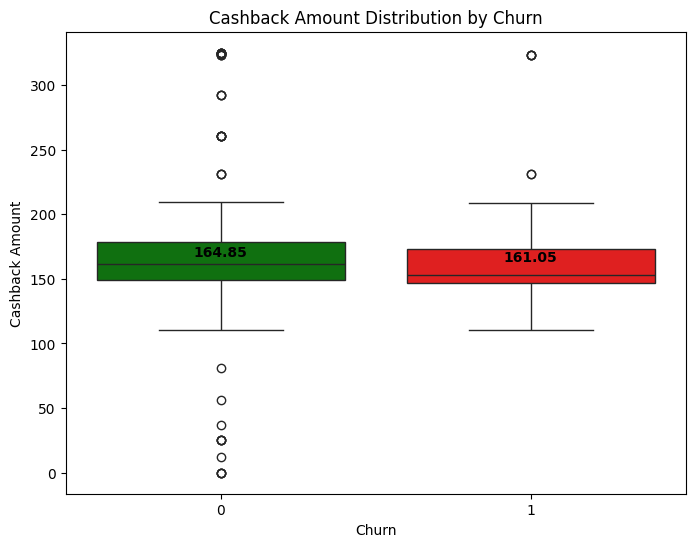

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='CashbackAmount', data=df_nonull, palette=['green', 'red'])

# Calculate the mean CashbackAmount for each churn category
means = df_nonull.groupby('Churn')['CashbackAmount'].mean()

# Add mean values as text annotations to the plot
for xtick in range(len(means)):
    plt.text(xtick, means[xtick], f'{means[xtick]:.2f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.title('Cashback Amount Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Cashback Amount')
plt.show()

Customers who did not churn had a slightly higher mean cashback amount (164.85) compared to those who churned (161.05), but the difference is marginal, suggesting cashback alone is not a strong driver of retention. The overlap in distributions indicates cashback impacts both groups similarly. Investigate outliers, especially those who churned despite receiving high cashback amounts. This could reveal potential issues such as dissatisfaction with the service or product, or customers exploiting cashback offers without contributing to long-term profitability.

**Comparing the distribution of HoursSpendOnApp claimed between customers who churned and those who didn't**

<ipython-input-16-0cdb06aae830>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='HourSpendOnApp', data=df_nonull, palette=['green', 'red'])


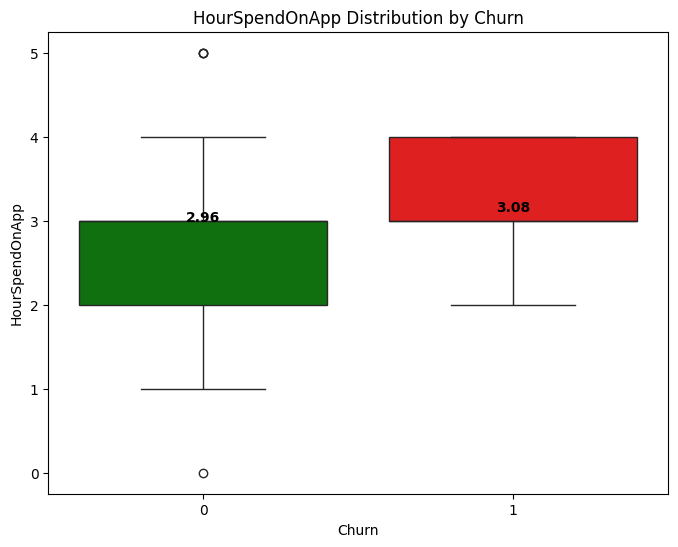

In [16]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df_nonull, palette=['green', 'red'])

# Calculate the mean HourSpendOnApp for each churn category
means = df_nonull.groupby('Churn')['HourSpendOnApp'].mean()

# Add mean values as text annotations to the plot
for xtick in range(len(means)):
    plt.text(xtick, means[xtick], f'{means[xtick]:.2f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.title('HourSpendOnApp Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('HourSpendOnApp')
plt.show()

Churned customers spent slightly more time on the platform (3.08 hours) than those who did not churn (2.96 hours), which may indicate engagement but also potential frustration or unmet expectations. The wider variability in hours spent by churned customers suggests different user experiences, possibly driven by navigation or service issues. To reduce churn, the business should analyze and address UX pain points, and proactively engage customers spending prolonged time on the platform with real-time support or personalized incentives.

**Comparing the distribution of NumberOfDevicesRegistred between customers who churned and those who didn't**

<ipython-input-17-b9605b722389>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df_nonull, palette=['green', 'red'])


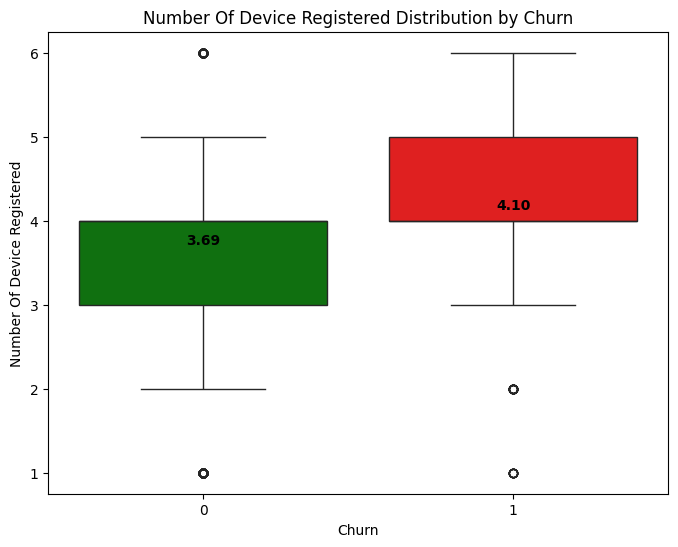

In [17]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df_nonull, palette=['green', 'red'])

# Calculate the mean NumberOfDeviceRegistered for each churn category
means = df_nonull.groupby('Churn')['NumberOfDeviceRegistered'].mean()

# Add mean values as text annotations to the plot
for xtick in range(len(means)):
    plt.text(xtick, means[xtick], f'{means[xtick]:.2f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.title('Number Of Device Registered Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Number Of Device Registered')
plt.show()

Churned customers registered more devices on average (4.10) than those who did not churn (3.69), suggesting they may have had higher expectations or a greater reliance on multi-device functionality. The wider variance in the churned group indicates that dissatisfaction or unmet needs among high-device users might be driving churn. To improve retention, the company should enhance multi-device support, offer tailored features for these users, and proactively address their needs through personalized engagement or loyalty programs.

**Comparing the distribution of OrderAmountHikeFromlastYear between customers who churned and those who didn't**

<ipython-input-18-ba6e44fb281f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='OrderAmountHikeFromlastYear', data=df_nonull, palette=['green', 'red'])


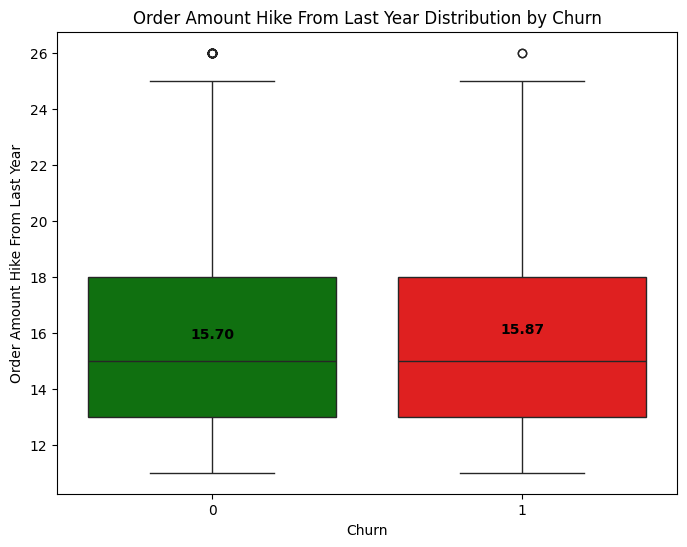

In [18]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='OrderAmountHikeFromlastYear', data=df_nonull, palette=['green', 'red'])

# Calculate the mean OrderAmountHikeFromLastYear for each churn category
means = df_nonull.groupby('Churn')['OrderAmountHikeFromlastYear'].mean()

# Add mean values as text annotations to the plot
for xtick in range(len(means)):
    plt.text(xtick, means[xtick], f'{means[xtick]:.2f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.title('Order Amount Hike From Last Year Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Order Amount Hike From Last Year')
plt.show()

The similar distributions and overlaps suggest that most customers were similarly affected by the order amount hikes. However, price sensitivity or unmet expectations might contribute to churn for certain customers.

**Comparing the distribution of NumberOfAddresses between customers who churned and those who didn't**

<ipython-input-19-a771c3b3e729>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='NumberOfAddress', data=df_nonull, palette=['green', 'red'])


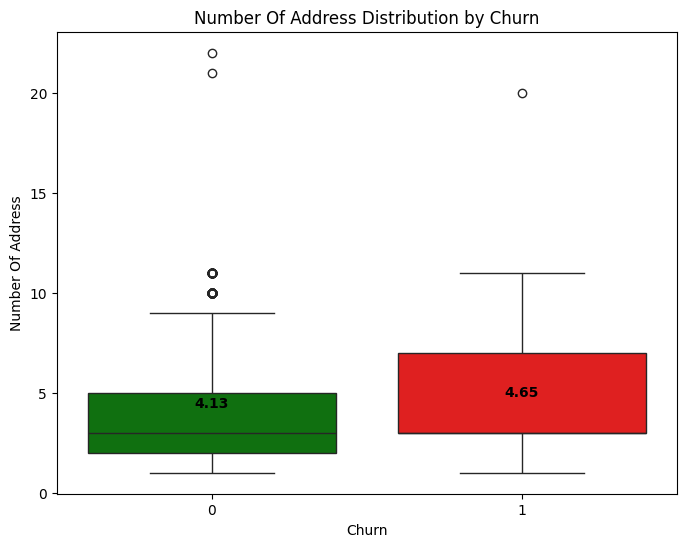

In [19]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='NumberOfAddress', data=df_nonull, palette=['green', 'red'])

# Calculate the mean NumberOfAddress for each churn category
means = df_nonull.groupby('Churn')['NumberOfAddress'].mean()

# Add mean values as text annotations to the plot
for xtick in range(len(means)):
    plt.text(xtick, means[xtick], f'{means[xtick]:.2f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.title('Number Of Address Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Number Of Address')
plt.show()

Churned customers registered slightly more addresses on average (4.65) than non-churned customers (4.13), with greater variability and more outliers, potentially reflecting logistical challenges or transient customer behavior. Addressing delivery issues and offering tailored support for high-address users can improve retention and enhance customer satisfaction.

Churned customers placed their last orders more recently (mean: 3.48 days) compared to non-churned customers (mean: 4.74 days), suggesting they disengaged shortly after making a purchase.

**Comparing the distribution of Tenure of customers who churned and those who didn't**

<ipython-input-20-2acb1f3a137c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df_nonull, palette=['green', 'red'])


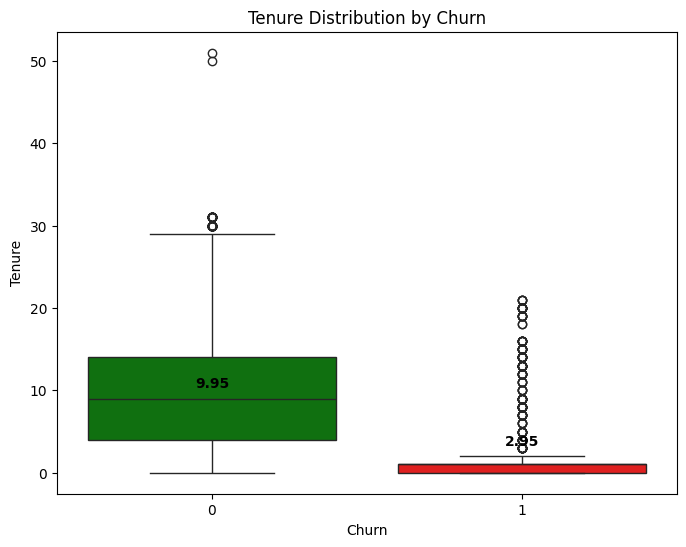

In [20]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Tenure', data=df_nonull, palette=['green', 'red'])

# Calculate the mean Tenure for each churn category
means = df_nonull.groupby('Churn')['Tenure'].mean()

# Add mean values as text annotations to the plot
for xtick in range(len(means)):
    plt.text(xtick, means[xtick], f'{means[xtick]:.2f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.title('Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

Non-churned customers have a much longer average tenure (9.95 months) than churned ones (2.95 months), highlighting the risk of churn in the early months. Improving onboarding and engaging new customers early can reduce churn, while rewarding long-tenured customers can strengthen loyalty.

**Comparing the churn rate between customers who churned and those that didn't based on their preffered payment methods**

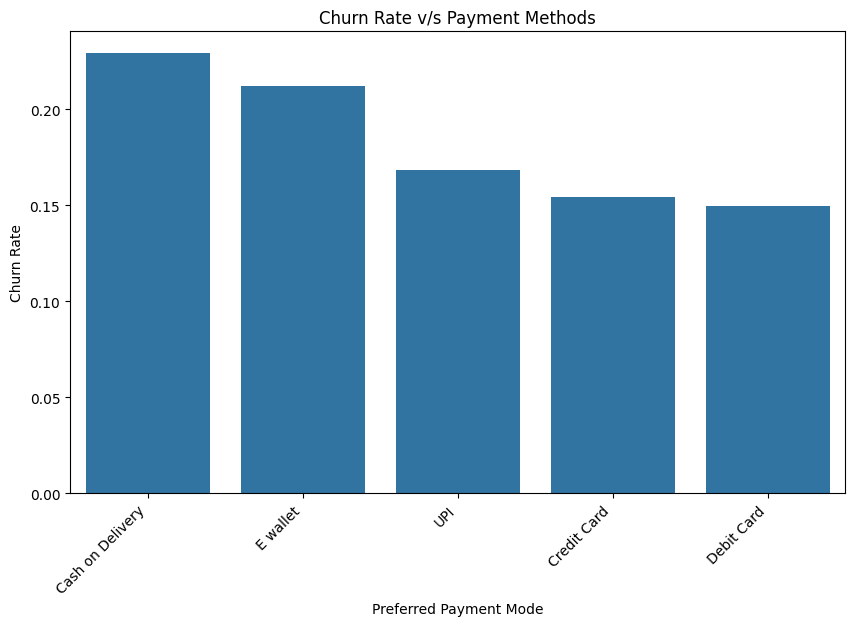

In [21]:
churn_rate = df_nonull.groupby('PreferredPaymentMode')['Churn'].value_counts(normalize=True).unstack()
churn_rate['Churn Rate'] = churn_rate[1] / (churn_rate[0] + churn_rate[1])

# Sort churn rates in descending order
churn_rate = churn_rate.sort_values(by='Churn Rate', ascending=False)

# Plotting the churn rate
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate.index, y='Churn Rate', data=churn_rate)
plt.title('Churn Rate v/s Payment Methods')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Churn rate highest for COD possbily due to issues like lack of change with the delivery agent leading the customer dissatisfaction

**Comparing the churn rate between customers who churned and those that didn't based on their City Tiers**

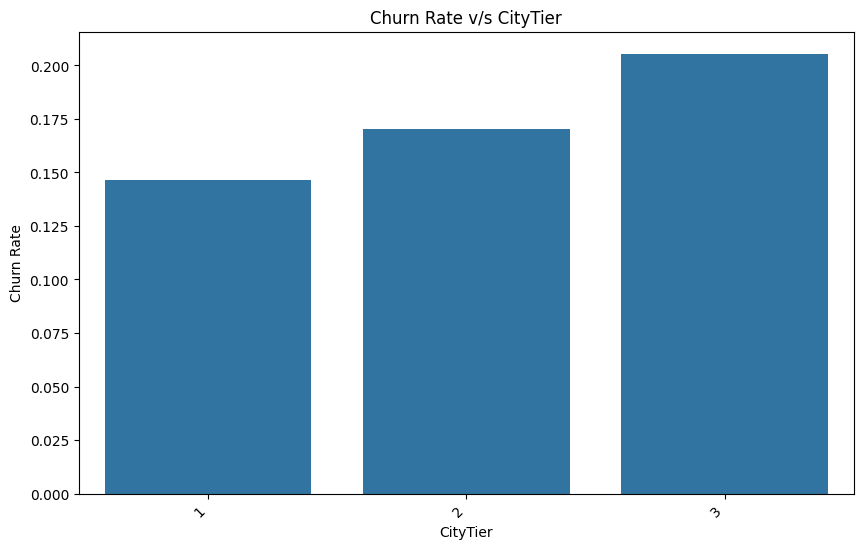

In [22]:
churn_rate_citytier = df_nonull.groupby('CityTier')['Churn'].value_counts(normalize=True).unstack()
churn_rate_citytier['churn_rate_CityTier'] = churn_rate_citytier[1] / (churn_rate_citytier[0] + churn_rate_citytier[1])

# Sort churn rates in descending order
churn_rate_citytier = churn_rate_citytier.sort_values(by='churn_rate_CityTier', ascending=False)

# Plotting the churn rate
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_citytier.index, y='churn_rate_CityTier', data=churn_rate_citytier)
plt.title('Churn Rate v/s CityTier')
plt.xlabel('CityTier')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Churn rate highest in tier 3 cities indicating distribution issues like accessibility or delays in these cities

**Comparing the churn rate between customers who churned and those that didn't based on their preffered device to make a purchase**

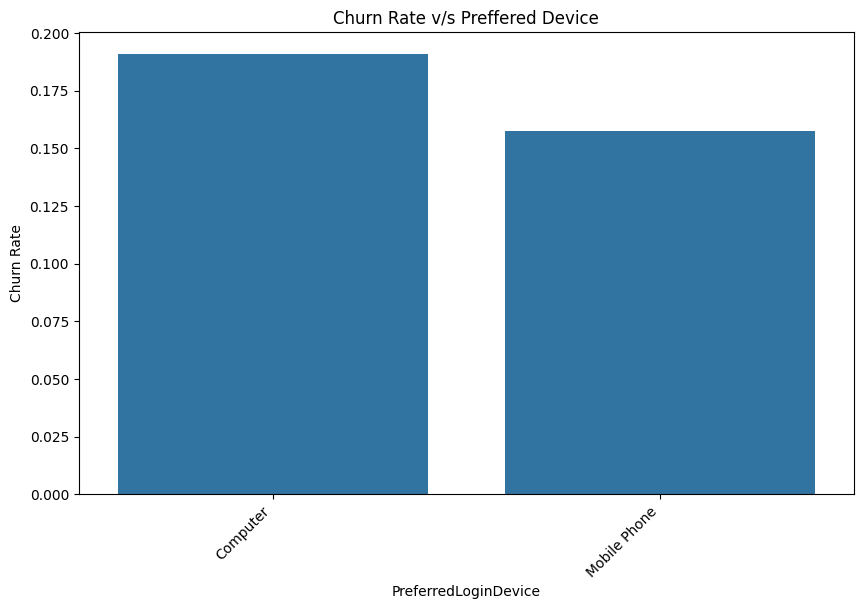

In [23]:
churn_rate_device = df_nonull.groupby('PreferredLoginDevice')['Churn'].value_counts(normalize=True).unstack()
churn_rate_device['Churn Rate'] = churn_rate_device[1] / (churn_rate_device[0] + churn_rate_device[1])

# Sort churn rates in descending order
churn_rate_device = churn_rate_device.sort_values(by='Churn Rate', ascending=False)

# Plotting the churn rate
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_device.index, y='Churn Rate', data=churn_rate_device)
plt.title('Churn Rate v/s Preffered Device')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Churn rate is higher for users preffereing computer indicating potential issues with the UI/UX of the website

**Train Test Split using a 70-30 split**

Stratified sampling has been used to ensure the traning and testing datasets have the 2 classes(churn v/s no churn) in a similar proportion to the original dataset

In [24]:
from sklearn.model_selection import train_test_split

# Assuming df_nonull is already defined as in the previous code

# Define features (X) and target (y)
X = df_nonull.drop('Churn', axis=1)
y = df_nonull['Churn']



# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2641, 18)
X_test shape: (1133, 18)
y_train shape: (2641,)
y_test shape: (1133,)


**Running a hyperparamater tuning to identify the best hyperparmaters for the model**

The scoring critera is taken as recall as the goal is to minimise the false negatives( Customers predicted as will not churn but they actually churn)

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd # Import pandas for data manipulation

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize LabelEncoder
le = LabelEncoder()

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical features in both training and testing sets
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# --- DIAGNOSE AND FIX TARGET VARIABLE ---
# Check unique values and type of y_train
print("Unique values in y_train:", y_train.unique())
print("Data type of y_train:", y_train.dtype)

# If y_train has unexpected values or type, try converting to numeric:
# y_train = pd.to_numeric(y_train, errors='coerce').astype('int')  # or 'category' if appropriate
# y_test = pd.to_numeric(y_test, errors='coerce').astype('int')   # or 'category' if appropriate

# Or, if y_train has string values 'yes'/'no' or similar, convert to 0/1:
#y_train = y_train.map({'yes': 1, 'no': 0}) # Replace 'yes' and 'no' with your actual values
#y_test = y_test.map({'yes': 1, 'no': 0}) # Replace 'yes' and 'no' with your actual values

# Assuming 'Churn' is an object type and needs conversion to numeric
y_train = pd.to_numeric(y_train, errors='coerce').astype(int)
y_test = pd.to_numeric(y_test, errors='coerce').astype(int)

# -------------------------------------------

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [15,20,25],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='recall')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate the model on the test set
best_dt_model = grid_search.best_estimator_
test_accuracy = best_dt_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Unique values in y_train: [0 1]
Data type of y_train: object
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 2}
Best cross-validation score: 0.6104698672114403
Test Accuracy: 0.8790820829655781


**The best hyperparameters were identified as**

Criterion:Gini

Max_depth- 10

min_samples_leaf-25

min_samples_split:2

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       944
           1       0.67      0.55      0.60       189

    accuracy                           0.88      1133
   macro avg       0.79      0.75      0.77      1133
weighted avg       0.87      0.88      0.87      1133

Confusion Matrix:
[[892  52]
 [ 85 104]]


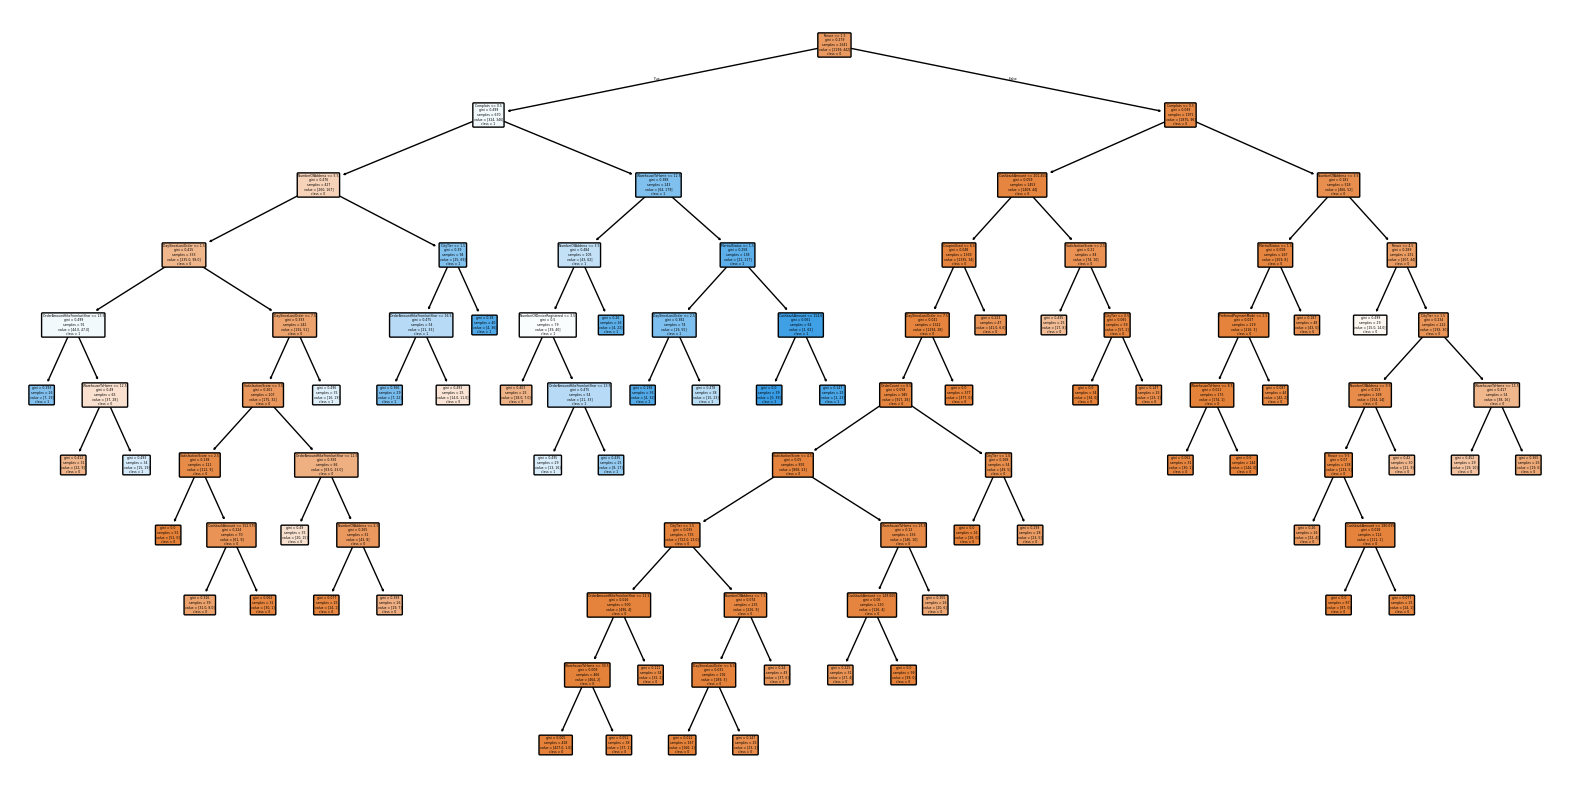

In [26]:


from sklearn.metrics import confusion_matrix, classification_report

# Assuming best_dt_model, X_test, and y_test are defined from the previous code

# Predict on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization (requires installation of pydotplus and graphviz)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_dt_model, feature_names=X_train.columns, class_names=['0','1'], filled=True, rounded=True)
plt.show()

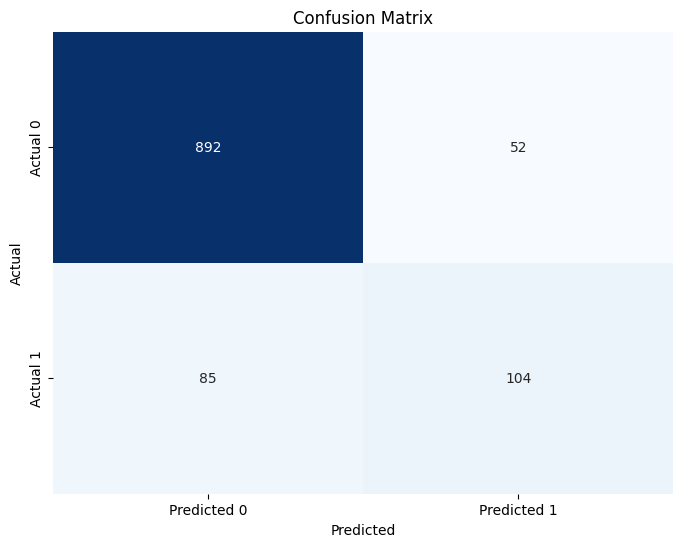

Accuracy: 0.8790820829655781
Precision: 0.6666666666666666
Sensitivity (Recall): 0.5502645502645502
Specificity: 0.9449152542372882


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Assuming best_dt_model, X_test, and y_test are already defined from the previous code

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)  # Sensitivity is the same as recall
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")

**Random Forest Model**

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, X_test, y_train, y_test, and le are already defined from the previous code

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples required to be at a leaf node
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='recall')

# Fit the Random Forest model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best hyperparameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation score for Random Forest: {best_score_rf}")

# Evaluate the best Random Forest model on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_rf))

# Calculate and print the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
sensitivity_rf = recall_score(y_test, y_pred_rf)
specificity_rf = cm_rf[0, 0] / (cm_rf[0, 0] + cm_rf[0, 1])

print(f"Accuracy (RF): {accuracy_rf}")
print(f"Precision (RF): {precision_rf}")
print(f"Sensitivity (Recall) (RF): {sensitivity_rf}")
print(f"Specificity (RF): {specificity_rf}")

Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score for Random Forest: 0.7711950970377937
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       944
           1       0.96      0.88      0.92       189

    accuracy                           0.97      1133
   macro avg       0.97      0.94      0.95      1133
weighted avg       0.97      0.97      0.97      1133

Confusion Matrix for Random Forest:
[[937   7]
 [ 23 166]]
Accuracy (RF): 0.9735216240070609
Precision (RF): 0.9595375722543352
Sensitivity (Recall) (RF): 0.8783068783068783
Specificity (RF): 0.9925847457627118
